In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df_input

,Time point,Population,Annotation,Well,Timepoint,x,y,clone,clone_cluster
84,6.0,LK,Mast,2,t_6.0,-1674.817,-867.362,2397,3
115,6.0,LK,Monocyte,2,t_6.0,2970.137,390.955,2187,5
190,6.0,LK,Mast,2,t_6.0,-1667.094,-846.103,3151,3
205,6.0,LK,Mast,2,t_6.0,-1769.354,-902.560,3151,3
337,6.0,LK,Meg,2,t_6.0,-1866.029,739.786,2217,2
...,...,...,...,...,...,...,...,...,...
130563,6.0,LSK,Neutrophil,1,t_6.0,1138.257,-2100.704,2782,7
130686,6.0,LSK,Monocyte,1,t_6.0,2853.309,216.481,830,4
130735,6.0,LSK,Neutrophil,1,t_6.0,1159.188,-2087.479,2717,7
130740,6.0,LSK,Monocyte,1,t_6.0,1782.111,-192.754,838,4


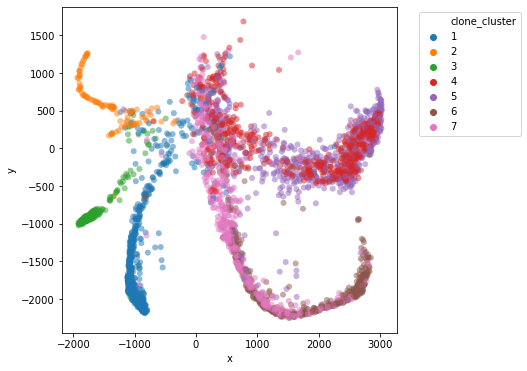

In [170]:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x="x", y="y",hue='clone_cluster', data=df_input,linewidth=0,alpha=0.5,
                    palette=sns.color_palette(n_colors=len(df_input['clone_cluster'].unique())))
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1))

In [171]:
import elpigraph

In [282]:
dict_epg = dict()
for i in np.unique(df_input['clone_cluster']):
    cl_i = df_input[df_input.clone_cluster==i][['x','y']].values
    # epg_i = elpigraph.computeElasticPrincipalTree(X = cl_i,
    #                                                 NumNodes = 50,
    #                                                 n_cores = 1,
    #                                                 drawAccuracyComplexity = False, drawEnergy = False,drawPCAView = False,
    #                                                 Do_PCA=False,CenterData=False)
    epg_i = elpigraph.computeElasticPrincipalCurve(X = cl_i,
                                                    NumNodes = 20,
                                                    n_cores = 1,
                                                    drawAccuracyComplexity = False, drawEnergy = False,drawPCAView = False,
                                                    Do_PCA=False,CenterData=False,
                                                    alpha=2,TrimmingRadius=500)    
    dict_epg[i] = epg_i

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  20  nodes on  612  points and  2  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||20	29108.0507	20	19	18	0	0	0	23435.31	inf	0.9739	-inf	5314.2155	358.5253	7170.5058	143410.1159	0


0.1504  seconds elapsed
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  20  nodes on  102  points and  2  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

BARCODE	ENERGY	NNODE

In [283]:
epg_color_palette = sns.color_palette(n_colors=len(df_input['clone_cluster'].unique()))
dict_epg_color = {i: epg_color_palette[i-1] for i in dict_epg.keys()}

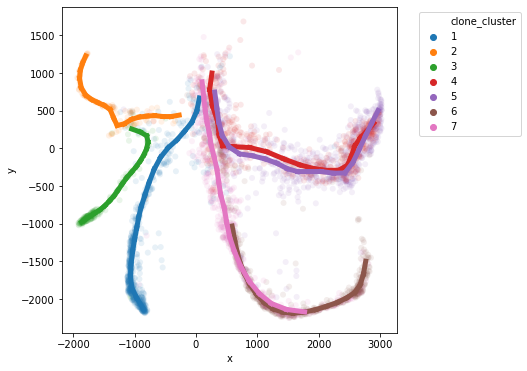

In [284]:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x="x", y="y",hue='clone_cluster', data=df_input,linewidth=0,alpha=0.1,
                    palette=sns.color_palette(n_colors=len(df_input['clone_cluster'].unique())))
for i in dict_epg.keys():
    epg_i = dict_epg[i]
    for ii in range(epg_i[0]['Edges'][0].shape[0]):
        edge_ii = epg_i[0]['Edges'][0][ii]
        nodes_pos_ii = epg_i[0]['NodePositions'][edge_ii,:]
        plt.plot(nodes_pos_ii[:,0],nodes_pos_ii[:,1],
                 color=dict_epg_color[i],
                 linewidth=5)

plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1))